In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
centers = np.array([[1, 1], [-1, -1], [1, -1]])

In [ ]:
from matplotlib import pyplot as plt
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
plt.subplot(2, 2, 1)
plt.hist(X)
plt.tight_layout()
plt.subplot(2, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c='red')
plt.tight_layout()
X = StandardScaler().fit_transform(X)
plt.subplot(2, 2, 3)
plt.hist(X)
plt.tight_layout()
plt.subplot(2, 2, 4)
plt.scatter(X[:, 0], X[:, 1], c='blue')
plt.tight_layout()

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [ ]:
print(f'Количество кластеров : {n_clusters:}')
print(f'Количество аномальный значений : {n_noise}')

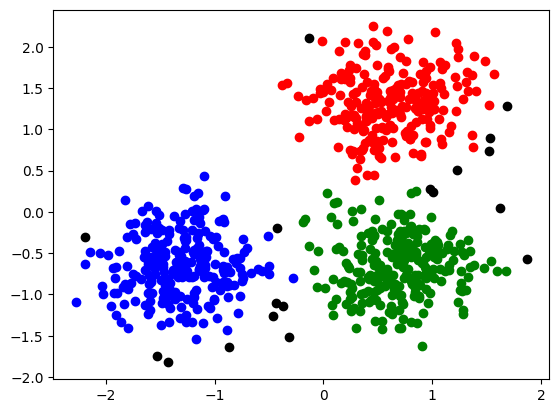

In [32]:
uniq = set(labels)
colors = ['red', 'blue', 'green', 'black']
for k, col in zip(uniq, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], marker='o', c=colors[k])
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], marker='o', c=colors[k])